In a notebook, please perform the following tasks:

Problem 1:

Predicting prices: Using any of the methods for prediction you have learned (With the exception of linear regression!) , use the dataset in this Kaggle page:
https://www.kaggle.com/altavish/boston-housing-dataset
and find a good prediction model for the the median value of housing (MEDV). The variables in the dataset are as follows

* CRIM: Per capita crime rate by town
* ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
* INDUS: Proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: Nitric oxide concentration (parts per 10 million)
* RM: Average number of rooms per dwelling
* AGE: Proportion of owner-occupied units built prior to 1940
* DIS: Weighted distances to five Boston employment centers
* RAD: Index of accessibility to radial highways
* TAX: Full-value property tax rate per 10,000
* PTRATIO: Pupil-teacher ratio by town
* B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
* LSTAT: Percentage of lower status of the population
* MEDV: Median value of owner-occupied homes in $1000s
Make sure to deal with null values and find the best hyperparameters you can for your choice of model (use train/test split or crossvalidation). Watch out for outliers!

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor as knn
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor as rf


In [2]:
url = r"C:\Users\jesse\Downloads\Bootcamp\HousingData.csv"
df = pd.read_csv(url)
df.dropna(inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [3]:
# finding columns with 0 in them
zero_columns = df.columns[(df == 0).any()]
print(zero_columns)

Index(['ZN', 'CHAS'], dtype='object')


In [4]:
# doing log of columns with no 0 in them
df['lnCRIM'] = np.log(df['CRIM'])
df['lnINDUS'] = np.log(df['INDUS'])
df['lnNOX'] = np.log(df['NOX'])
df['lnRM'] = np.log(df['RM'])
df['lnAGE'] = np.log(df['AGE'])
df['lnDIS'] = np.log(df['DIS'])
df['lnRAD'] = np.log(df['RAD'])
df['lnTAX'] = np.log(df['TAX'])
df['lnPTRATIO'] = np.log(df['PTRATIO'])
df['lnB'] = np.log(df['B'])

In [5]:
# doing cross validation with knn model, hyperparameter tuning
scoreCV=[cross_val_score(knn(n_neighbors=i),X=df[['lnCRIM','ZN','lnINDUS','CHAS','lnNOX','lnRM','lnAGE','lnDIS','lnRAD','lnTAX','lnPTRATIO','lnB','LSTAT']],
                y=df['MEDV'],
                         cv=5).mean() for i in list(range(5, 300))]

In [6]:
df_CV=pd.DataFrame(scoreCV, columns=['scores'])
df_CV['neighbors']=list(range(5, 300))

df_CV
#What is the optimal number of neighbors
max_row = df_CV.loc[df_CV['scores'].idxmax()]
max_row

scores       0.249108
neighbors    9.000000
Name: 4, dtype: float64

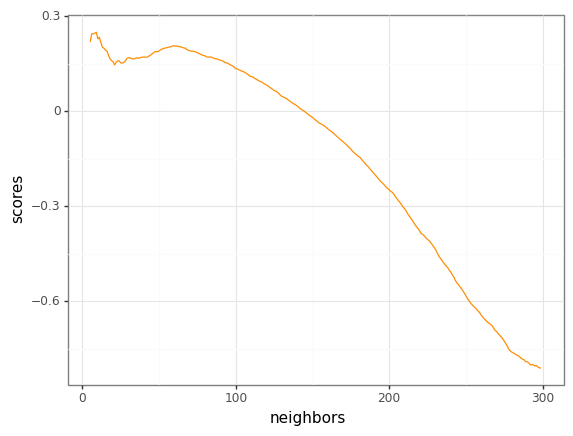

<ggplot: (118635839010)>

In [7]:
(ggplot(df_CV, aes(x='neighbors', y='scores'))+
 geom_line(color='darkorange')+
theme_bw())

In [8]:
# trying random forest 
scoresrf=[cross_val_score(rf(n_estimators=100,max_depth=i),
                          df[['lnCRIM','ZN','lnINDUS','CHAS','lnNOX','lnRM','lnAGE','lnDIS','lnRAD','lnTAX','lnPTRATIO','lnB','LSTAT']],df['MEDV'],
                          cv=5).mean() for i in list(range(1,15))
    ]

In [9]:
rf_df=pd.DataFrame(scoresrf, columns=['scores'])

rf_df['depth']=list(range(1,15))
rf_df

,scores,depth
0,-0.014785,1
1,0.501059,2
2,0.562419,3
3,0.551469,4
4,0.547312,5
5,0.560984,6
6,0.584335,7
7,0.579940,8
8,0.547235,9
9,0.590343,10


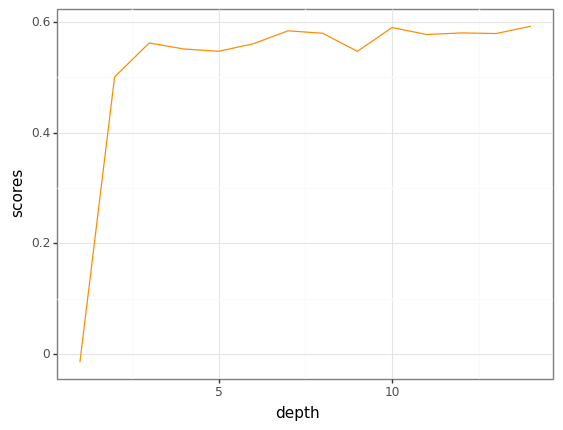

<ggplot: (118636468730)>

In [10]:
(ggplot(rf_df, aes(x='depth', y='scores'))+
geom_line(color='darkorange')+
theme_bw())

In [11]:
#Let's find the maximum depth

rf_df.loc[rf_df['scores']==rf_df.scores.max(), 'depth']

13    14
Name: depth, dtype: int64

In [12]:
scoresrf=cross_val_score(rf(n_estimators=100,max_depth=3),
                          df[['lnCRIM','ZN','lnINDUS','CHAS','lnNOX','lnRM','lnAGE','lnDIS','lnRAD','lnTAX','lnPTRATIO','lnB','LSTAT']],df['MEDV'],
                          cv=5).mean()
scoresrf

0.5621133116029897

Problem 2

Classification: Using the following dataset:
https://www.kaggle.com/vikasukani/parkinsons-disease-data-set
Create the best classification model you can using what we learned in class. Use any of the methods we explored and show how you assessed how good your model is carefully. Using AUC is a good idea. The label variable is "status." Hint: .data files can be read with read_csv like:

pd.read_csv('parkinsons.data')

The variables are as follows:


name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%) , MDVP:Jitter(Abs) , MDVP:RAP , MDVP:PPQ , Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer , MDVP:Shimmer(dB) , Shimmer:APQ3 , Shimmer:APQ5 , MDVP:APQ , Shimmer:DDA - Several measures of variation in amplitude

NHR , HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE , D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1 , spread2 , PPE - Three nonlinear measures of fundamental frequency variation

In [13]:
url = r"C:\Users\jesse\Downloads\Bootcamp\parkinsons.data"
df = pd.read_csv(url)
df.dropna(inplace=True)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### balancing data

In [14]:
df_majority = df[df['status']==0]
df_minority = df[df['status']==1]

In [15]:
df_majority.shape

(48, 24)

In [16]:
df_minority.shape

(147, 24)

Heavily baised toward one side

In [17]:
df_majority_up = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=147,   
                                 random_state=42)
df_majority_up.shape

(147, 24)

In [18]:
df_up=pd.concat([df_majority_up, df_minority])
df_up.shape

(294, 24)

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

feature_list = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
new_X = df_up[feature_list]
new_y = df_up['status'] 
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.20)

# Fit RandomForestClassifier and get predicted probabilities
predRF2_proba = RandomForestClassifier().fit(X_train, y_train).predict_proba(X_test)

# Round predicted probabilities to 0 or 1
predRF2 = np.where(predRF2_proba >= 0.5, 1, 0)

# Create a new DataFrame to store the results
df = X_test.copy()
df['status'] = y_test
df['predRF2'] = predRF2[:, 1]  # Update to select the second column of predRF2 (probabilities of positive class)

df.head()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status,predRF2
43,241.404,248.834,232.483,0.00281,0.00001,0.00157,0.00173,0.00470,0.01760,0.154,...,0.00675,23.145,0.457702,0.634267,-6.793547,0.158266,2.256699,0.117399,0,0
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0,0
194,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,...,0.04398,21.209,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569,0,0
90,166.605,206.008,78.032,0.00742,0.00004,0.00387,0.00453,0.01161,0.06640,0.634,...,0.08725,11.744,0.653410,0.733165,-4.508984,0.389232,3.317586,0.301952,1,1
87,176.281,227.381,125.610,0.00520,0.00003,0.00287,0.00312,0.00862,0.06511,0.580,...,0.04824,13.922,0.602874,0.740837,-5.515071,0.299549,3.136550,0.220968,1,1


In [20]:
print(classification_report(y_pred=df['predRF2'],
                            y_true=df['status']))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.97      0.98        33

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



In [21]:
from sklearn.metrics import roc_auc_score

roc_auc_score1 = roc_auc_score(y_true=df[['status']], y_score=df[['predRF2']])

print('predRF2: ' + str(roc_auc_score1))

predRF2: 0.9848484848484849


In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming df is the DataFrame containing the predicted probabilities and true labels

y_proba = df['predRF2'] # Update to select the 'predRF2' column from df
fpr, tpr, threshold = roc_curve(y_test, y_proba) # Update to use y_test as true labels
auc = roc_auc_score(y_test, y_proba) # Update to use y_test as true labels

results = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'threshold': threshold})
results.head()


,fpr,tpr,threshold
0,0.0,0.000000,2
1,0.0,0.969697,1
2,1.0,1.000000,0


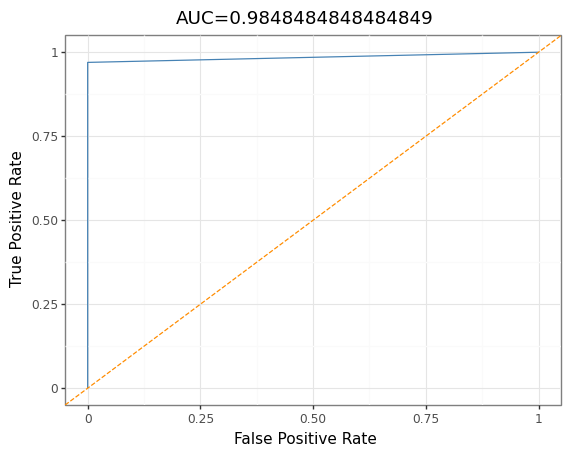

<ggplot: (118636404535)>

In [23]:
(ggplot(data=results, mapping=aes(x='fpr', y='tpr'))+
geom_line(color='steelblue')+
ggtitle(f'AUC={auc}')+
geom_abline(linetype='dashed', color='darkorange')+
 ylab("True Positive Rate")+
 xlab("False Positive Rate")+
 theme_bw()
)

In [24]:

X = df[feature_list]
y = df['status']

In [25]:
cross_val_score(RandomForestClassifier(), X, y, scoring="roc_auc", cv = 5)

array([1.        , 1.        , 0.68571429, 1.        , 1.        ])

In [26]:
scoresrf=[cross_val_score(RandomForestClassifier(n_estimators=100,
                                 max_depth=i),X,y,
                          scoring="roc_auc",
                          cv=5).mean() for i in list(range(1,30))
    ]
rfdf=pd.DataFrame(scoresrf, columns=['AUC'])
rfdf['depth']=range(1,30)
rfdf

,AUC,depth
0,0.822381,1
1,0.880317,2
2,0.914444,3
3,0.913333,4
4,0.897302,5
5,0.925714,6
6,0.937302,7
7,0.933413,8
8,0.908730,9
9,0.920159,10


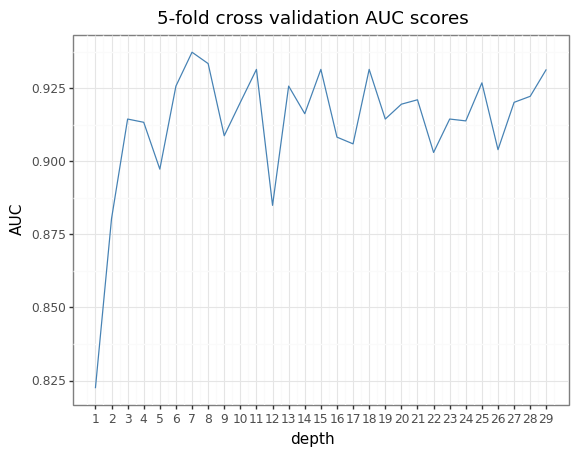

<ggplot: (118636484184)>

In [27]:
(ggplot(data=rfdf, mapping=aes(x='depth', y='AUC'))+
       geom_line(color='steelblue')+
 scale_x_continuous(breaks=np.arange(1,30, 1))+
 ggtitle('5-fold cross validation AUC scores')+
theme_bw())

In [28]:
#Let's find the optimal  depth
rfdf.loc[rfdf['AUC']==rfdf['AUC'].max(),:]

,AUC,depth
6,0.937302,7


In [29]:
# Even though top is around twently it, around 3 is the best (given the fact we desire least amount of depth as well)
# since its accuracy jumps around the AUC value after that depth
# this turned out to receive a very high AUC score. 
# However, it is not overfitting as I split the training 
# and tested and tested it only on the testing data
rfdf.loc[rfdf['depth']==3,:]

,AUC,depth
2,0.914444,3


Problem 3

Dataset for final project Initial ideas:  Find 2 possible open datasets (or a way to construct a dataset), and present the following:

Context of the dataset: What is interesting about the dataset? What questions could you ask that are interesting? How would you first explore the data? (No need to perform exploration at this moment)

Here are some places to find datasets:

https://www.kdnuggets.com/datasets/index.html

Methodology: How do you think you want to answer your question? 

Present links for references if available. 